# K-Means Clustering

Identifying some patterns in data.

We've dataset Mall_Customers.csv having Age ,Gender , Income and spending score of various customers created by Data Analysts.

Gonna build a model to classify individual based on their Information as independent variable , which class they belong to ?

Create a dependent variable that takes finite no of values & each value will be class of this dependent variable we're going to create in K means.


## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values


# or X = dataset.iloc[:,3:].values
#print(X)

#Customer id , age , Genre are not required for clustering here .So Using required Annual income vs Spending Score as the variables here.
#We need to plot Two features on X and y axis to form clusters , can't use more than two as one axis per one feature is required.

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

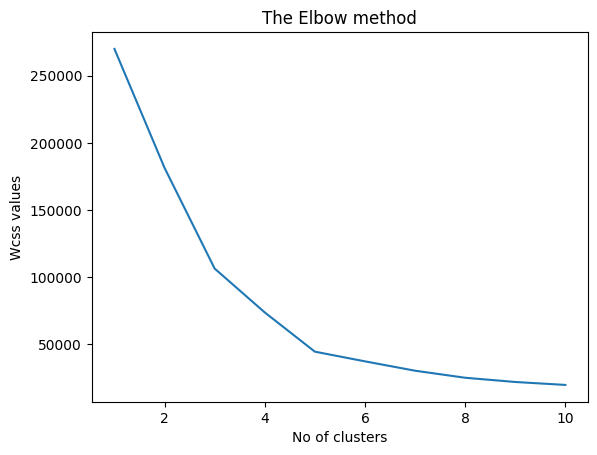

In [ ]:
# KMeans class of cluster module from scikitlearn library is used for k means clustering.

from sklearn.cluster import KMeans
#not gonna create object/instance , we've to run k means for 10 clusters using KMeans class
#So , using wcss (within clusters sum of squares)-Brief theory in pdf
#Using loop we'll calculate WCSS Values for all points & then save in the array as:
#KMeans takes no of clusters, init = method to avoid random initialization of centroid = KMeans++ , random_state = any random no
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++' , random_state=42)
    kmeans.fit(X)                    #Training the clusters formed in each loop on Matrix X.
    wcss.append(kmeans.inertia_)     #Obtained clusters after using attribute inertia_ will give WCSS value , then appended to our empty list.

#Loop ends and now we need to plot the graph , X axis - 1 to 10 values for No of cluster , Y axis contains respective WCSS value.

plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Wcss values')
plt.show()

#Obtained no of clusters per WCSS Value obtained & optimum value of clusters using elbow method will be used for Training kmeans++ model next.
# After cluster 5 Wcss value drops linearly , so No of clusters to use is 5 here.

## Training the K-Means model on the dataset

In [ ]:
# For 5 clusters training the dataset X , Training our KMeans ++ algorithm as:

kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

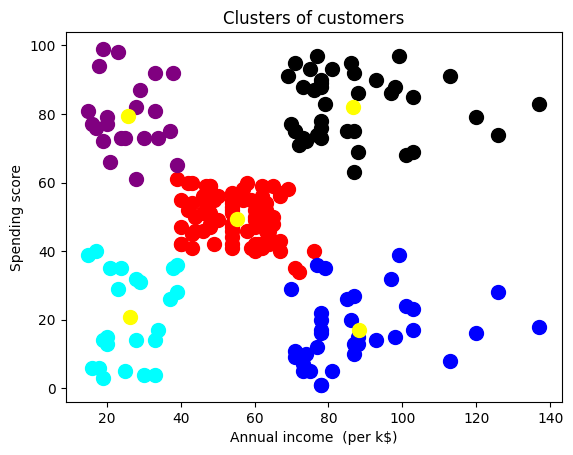

In [ ]:
# we've to plot scatter fxn 5 times as 5 clutsers are to formed for Annual income vs Spending score dataset
#While scatter plot on graph , X axis requires Annual income that's 0th column of X matrix & rows that are clustered 0 to be taken, using
# X[y_kmeans==0],0   will do the same & similarly upto all 5 clusters .
# s=100 will signify size , so as to view datapoints on larger scale.

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1] , s=100 , c='red' , label ='cluster1' )
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1] , s=100 , c='blue' , label ='cluster2' )
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1] , s=100 , c='cyan' , label ='cluster3' )
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1] , s=100 , c='purple' , label ='cluster4' )
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1] , s=100 , c='black' , label ='cluster5' )

#to plot the centroids ,(using kmeans.cluster_centers_(x axis values) & y axis values) [:,0] - all row & 0th column.
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100 , c='yellow' , label = 'centroids')

plt.title('Clusters of customers')
plt.ylabel('Spending score')
plt.xlabel('Annual income  (per k$)')
plt.legend()   #Provide the Cluster numbering as Cluster1 ,2 ,3 & so on.
plt.show()

#Cluster 1 is the type which spends less in the mall & have less annual income & so on .

#Obtained clusters can be used to Obtain customers insights for business benefits & boost profit by providing offers to various clusters as per type
#Customers with high spending score & annual income can be targeted for exclusive yet expensive offers.
#But not those have high spending score & low annual income as they are priorly spending much & so on for other categorys too.
# Majorly target those with low spending score yet high income.

#That's purpose of CLustering.